<h4><b>Here, I used the Principal Component Analysis -PCA tool for the regression</b></h4>

In [1]:
# importing necessary modules
# and loading the white wine dataset
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# load data 
df = pd.read_csv("white_wine_cleaned.csv")
df = df.drop_duplicates()

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
len(df.columns)

12

In [8]:
X = df.drop("quality", axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define amount of PCA-variables => principal components
num_components = 8

# train the PCA -model
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# some basic metrics
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio with {num_components} components, by each component:\n{explained_variance_ratio}")

print(f"\nExplained variance ratio with {num_components} components, total result:\n{sum(explained_variance_ratio)}")

# ~~ 93% of data preserved, which means 
#  variance in the process only lost approximately 7%

X_reconstructed = pca.inverse_transform(X_pca)

# other metric is MSE => keep this as close to 0 as possible
# basically measures how much error the PCA model makes compared to original data
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f"\nMean Squared Error (MSE) between original and reconstructed data:\n{mse}")

Explained variance ratio with 8 components, by each component:
[0.28941239 0.14513327 0.11027694 0.09445886 0.08919371 0.08448178
 0.06564064 0.05473092]

Explained variance ratio with 8 components, total result:
0.9333285099201941

Mean Squared Error (MSE) between original and reconstructed data:
0.06667149007980583


<h4><b>Explained Variance Ratio</b> for each componet (8 Component) that there is decreasing amounts of variance, with the first component contributing ~29% and the last one ~5.5%.
All the 8 components showed ~93.33% of the total variance and that is total <b>Explained Variance ratio</b> (93.33%).
I would this indicates that ~93% of the original dataset's information is preserved with the 8 components. And about ~7% of the variance is lost during dimensionality reduction.
<b>Mean Squared Error (MSE = 0.0667)</b>, showed the reconstruction error is small, meaning the PCA-transformed dataset retains most of the original structure and data relationships. And conclusively
<ul>
<li>PCA retains ~93.33% of the original variance with 8 components, while losing ~7% variance.</li>
<li>Also, the MSE of 0.0667 shows minimal distortion in reconstructing the original data.</li>
<li>I think this process is good for dimensionality reduction while maintaining most of the dataset's information.</li>
<li>I also find out that, lesser num_components say 6 only retained/preserved about 81% ( <b>Total Explained Variance ratio</b>) in the dataset.</li>
<li>Shown in the below code cell.</li>
</ul>
</h4>




<h4><b>Primarily is to scale the values and train the Principal Component Analysis (PCA) algorithm </b></h4>

In [ ]:
# X/y -split and then scale the values
X = df.drop("quality", axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define amount of PCA-variables => principal components
num_components = 6

# train the PCA -model
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# some basic metrics
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio with {num_components} components, by each component:\n{explained_variance_ratio}")

print(f"\nExplained variance ratio with {num_components} components, total result:\n{sum(explained_variance_ratio)}")

# ~~ 93% of data preserved, which means 
#  variance in the process only lost approximately 7%

X_reconstructed = pca.inverse_transform(X_pca)

# other metric is MSE => keep this as close to 0 as possible
# basically measures how much error the PCA model makes compared to original data
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f"\nMean Squared Error (MSE) between original and reconstructed data:\n{mse}")

Explained variance ratio with 6 components, by each component:
[0.28941239 0.14513327 0.11027694 0.09445886 0.08919371 0.08448178]

Explained variance ratio with 6 components, total result:
0.8129569459169629

Mean Squared Error (MSE) between original and reconstructed data:
0.18704305408303712


<h4><b>Here, is to organize the PCA loadings, that will show how much each original feature contributes to each principal component (PC).</b></h4>

In [9]:
# get the component loadings
loadings = pca.components_

# create a DataFrame
loadings_df = pd.DataFrame(
    loadings.T,
    columns=[f"PC{i + 1}" for i in range(loadings.shape[0])], index=X.columns
)

In [10]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
fixed acidity,0.152835,0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920
volatile acidity,0.026771,-0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064
citric acid,0.151911,0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173
residual sugar,0.422095,-0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158
chlorides,0.211968,0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997
free sulfur dioxide,0.308153,-0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128
total sulfur dioxide,0.416806,-0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100
density,0.512038,-0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298
pH,-0.114020,-0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391
sulphates,0.047439,-0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051


<h4><b>Contributions of the features to each Principal Component:</b></h4>
<h4>fixed acidity
<ul>
<li>Strong influence- PC2 and PC8 (huge positive contributions).</li>
<li>Moderate influence- PC5 and PC7 (one positive, one negative).</li>
<li>Negligible influence- PC4 and PC6.</li>
</ul>
So, fixed acidity is most strongly associated with PC2 and PC8, with notable contributions to PC5 and PC7, while having little to no relationship with PC4 and PC6. 
</h4>

<h4>volatile acidity
<ul>
<li>Strong influence-PC3 (very strong positive influence), next is PC6 (strong positive influence) </li>
<li>Moderate influence - PC4, PC5 and PC7 are mildly positively influence  volatile acidity</li>
<li>Negligible influence- PC1, PC2 (with positive and negative) and PC8</li>
</ul>
Therefore, volatile acidity is most strongly associated with PC3, followed by PC6. It also has noticeable contributions to PC5, PC4, and PC7, while contributing minimally or negatively to PC1, PC2, and PC8.
</h4>

<h4>citric acid
<ul>
<li>Strong influence- PC7 (very strong positive influence) </li>
<li>Moderate inluence- PC2 and PC3 moderatly inluences (one positive and the other negative) </li>
<li>Negligible influence- PC5 and PC8 (with positive and negative) </li>
</ul>
So, citric acid is mostly strongly associated with PC7 while PC1, PC4, PC6 could be said mildly and of course PC2 and PC3 are highly moderatly inluenced (with positive and negative). Then contributing minimally or negatively is PC5 and PC8
</h4>

<h4>residual sugar
<ul>
<li>Strong contributior- has strong positive and negative influence on PC1 and PC8 .</li>
<li>Moderate contributor- has positive moderatly inlfuence on PC3 and PC7 while PC4 and PC6 mildly negatively influenced </li>
<li>Negligible contributor- PC2 negatively have no inluence.</li>
</ul>
residual sugar is strongly associated with the PC1 and PC8 while the following PC3, PC7, PC4 and PC6 are moderately contributed (positively and negatively). And PC2 contributed very minimal to residual sugar negatively though. 
</h4>

<h4>chlorides
<ul>
<li>Strong contributor- has very strong positive influence on PC4 </li>
<li>Moderate contributor- has moderately influence on PC1 and PC6 (positively) while PC5 and PC8 (negatively) </li>
<li>Negligible contributor- has no contributions on PC2 and PC7</li>
</ul>
I would say that the chlorides have a strong association with PC4 while moderately contributed positively and negatively to PC1, PC6 and PC5, PC8
</h4>

<h4>free sulfur dioxide
<ul>
<li>Strong influence- this feature has a strong positive influence on PC1 and PC6</li>
<li>Moderate influence- PC2, PC3 and PC4 are moderately inluenced negatively</li>
<li>Negligible influence- has relatively no influence on PC5 and PC8</li>
</ul>
So, free sulfur dioxide is strongly associated with PC1 and PC6,and PC2, PC3 and PC4 are moderately contributed while PC5 and PC8 have no significant at all.
</h4>

<h4>total sulfur dioxide
<ul>
<li>Strong influence- has positive contributions to PC1 and PC6</li>
<li>Moderate influence- has negative influence on PC2 and PC8</li>
<li>Negligible influence- there is negative minimal influence on PC4 and PC7</li>
</ul>
This feature is strongly associated with PC1 and PC6 while moderately contributed to PC2 and PC8 and PC4 and PC7 have no or minimal significant.
</h4>

<h4>density
<ul>
<li>Strong contributor- has a very strong positive influence on PC1 and strong negative influence on PC6</li>
<li>Moderate contributor- has positive moderate influence on PC3</li>
<li>Negligible contributor- PC4, PC5,PC7 and PC8 are positively minimally influenced and PC2 negatively.</li>
</ul>
density has a very strong positive association with PC1 and with PC6 strong negative association. While PC3 is moderately contributed and contributing minimally or negatively to PC4, PC5,PC7, PC8 and PC2
</h4>

<h4>pH
<ul>
<li>Strong contributor- it has strong positive contributions to PC7 and PC8 while strong negative PC2</li>
<li>Moderate contributor- has positive moderate contributions to PC4 while negative moderate contribution to PC3 and PC6</li>
<li>Negligible contributor- PC5 is negatively influence with so minimal value</li>
</ul>
The pH is strongly associated with PC7 and PC8 positively and negatively with PC2. While it contributed moderately to PC4 (positively) and PC3 & PC6 (negatively), and has minimal influence on PC5- negatively.
</h4>

<h4>sulphates
<ul>
<li>Strong contributor- has a very strong positive and strong positive contributions to PC5 and PC4</li>
<li>Moderate contributor- has moderate negative influence on PC3, PC7, PC8 and PC2</li>
<li>Negligible contributor- PC1 and PC5 have minimal influence (positive and negative) </li>
</ul>
The sulphates are highly strongly and strongly associated positively to PC5 and PC4 while it has contributed moderately to PC3, PC7, PC8 and PC2 (negatively). And has minimal influence on PC1 and PC5 -positively and negatively
</h4>

<h4>alcohol
<ul>
<li>Strong contributor- has strong negative influence on PC1</li>
<li>Moderate contributor- PC5, PC6 and PC7 are positvely influenced while PC4 and PC8 are negatively moderately inlfuenced.</li>
<li>Negligible contributor- PC2 and PC3 are minimally influenced (positevely and negatively) </li>
</ul>
Therefore, the alcohol is strongly negatively associated with PC1 while PC5, PC6 and PC7 contributed positively (moderately) and PC4 and PC8 are negatively moderately inlfuenced. And 'alcohol' has minimal influence on PC2 and PC3 respectively (positive and negative).
</h4>




<Axes: >

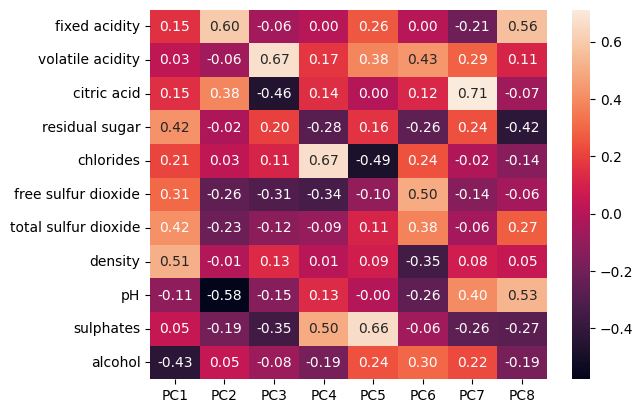

In [ ]:
# comparing with the above Principal Component on each feature
# it can be said they are closely the same output
# as the correlation below
sns.heatmap(loadings_df, annot=True, fmt=".2f")

<h4><b>Noise management finding the noise from the Data Analysis </b></h4>

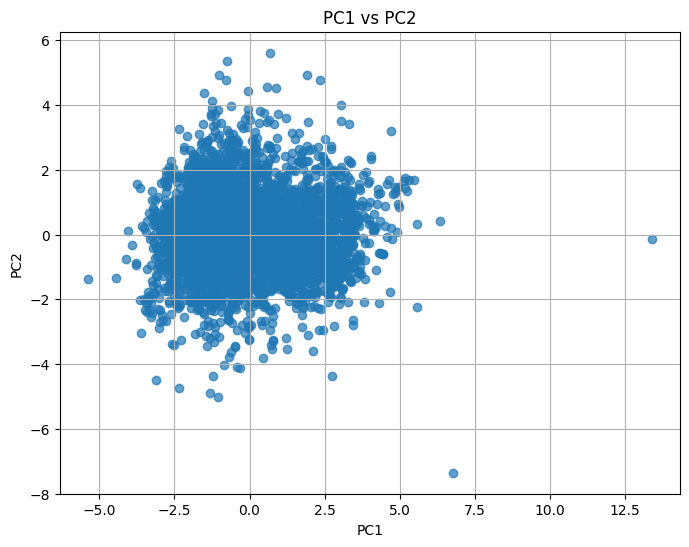

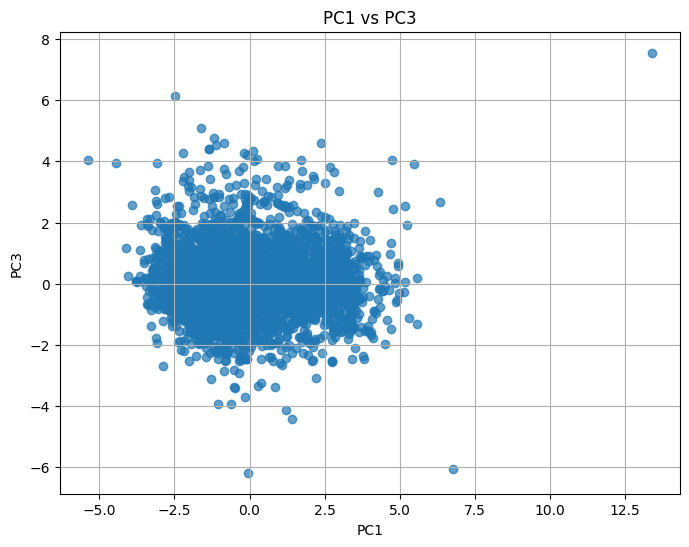

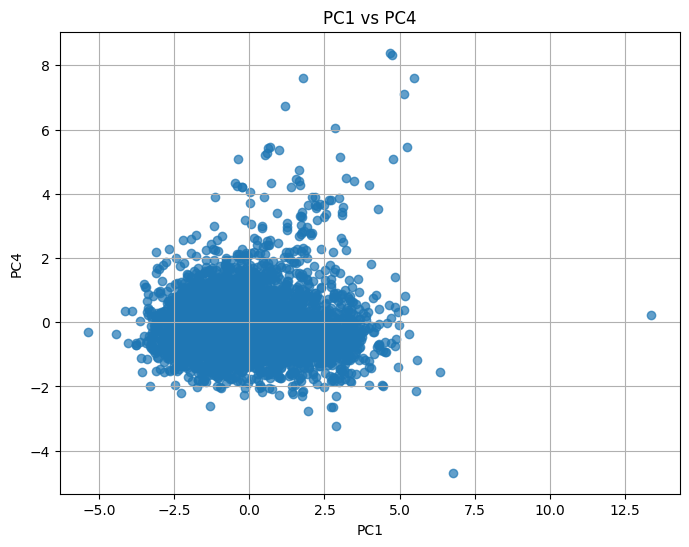

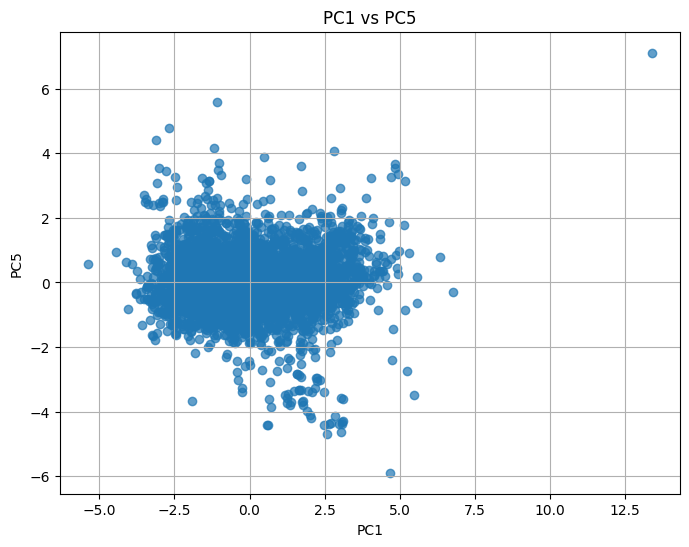

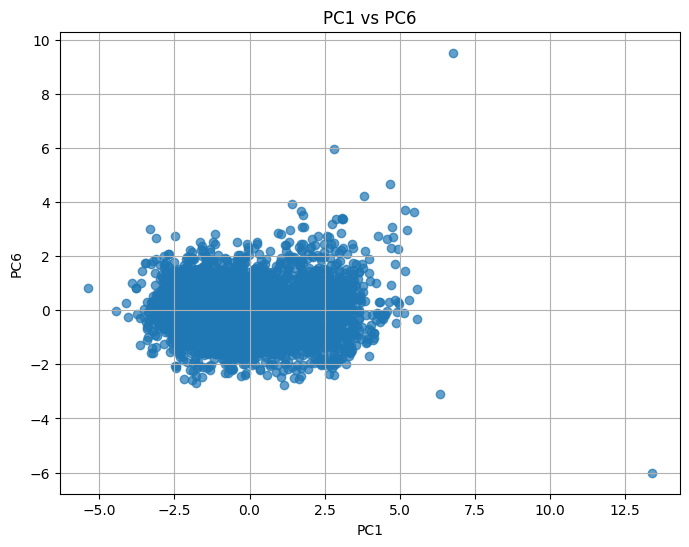

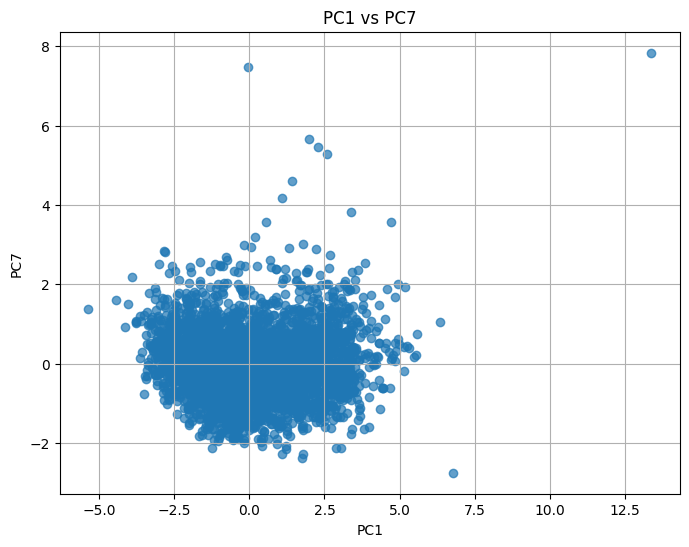

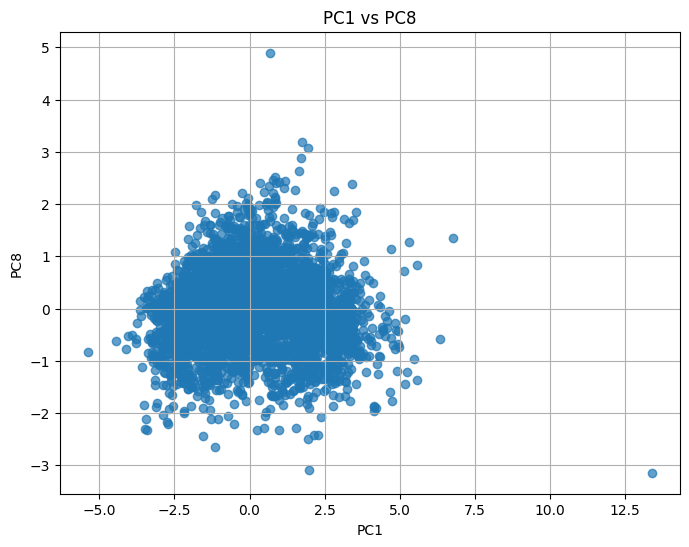

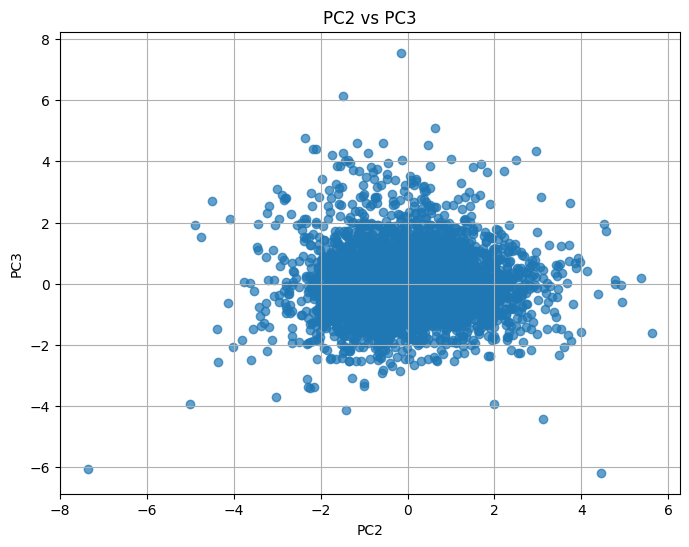

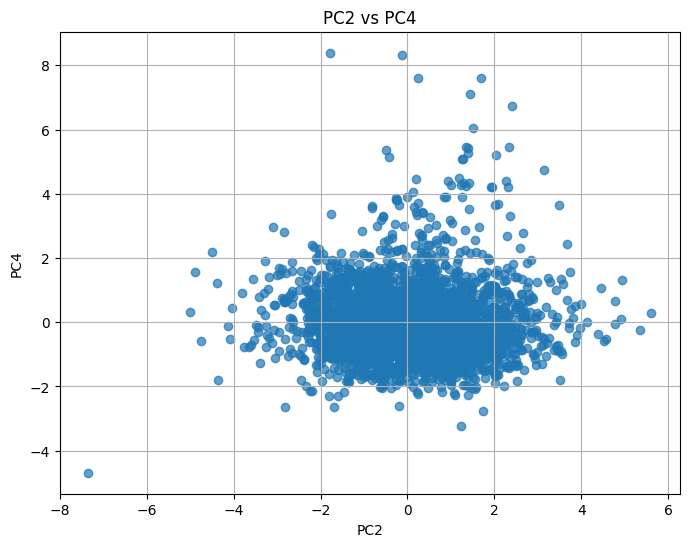

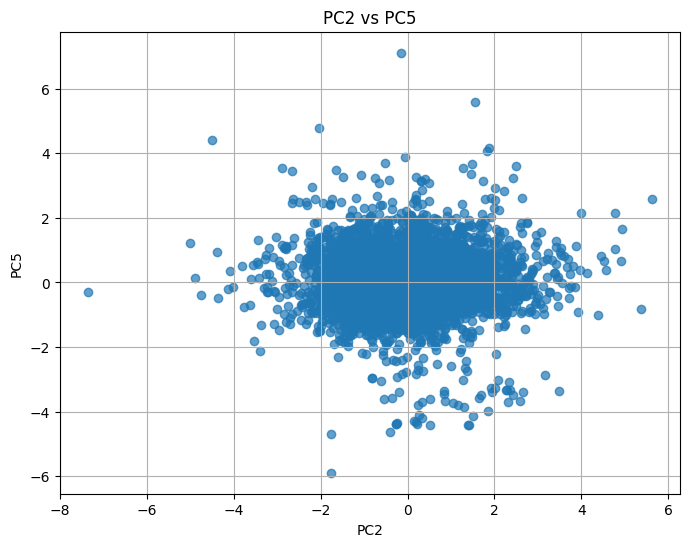

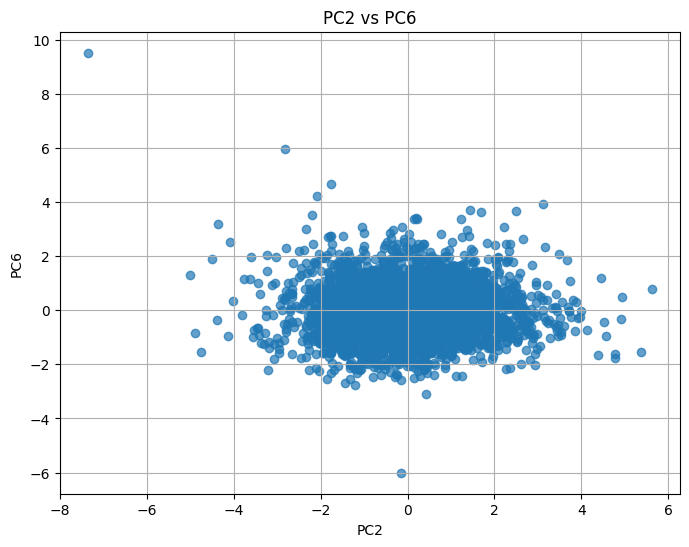

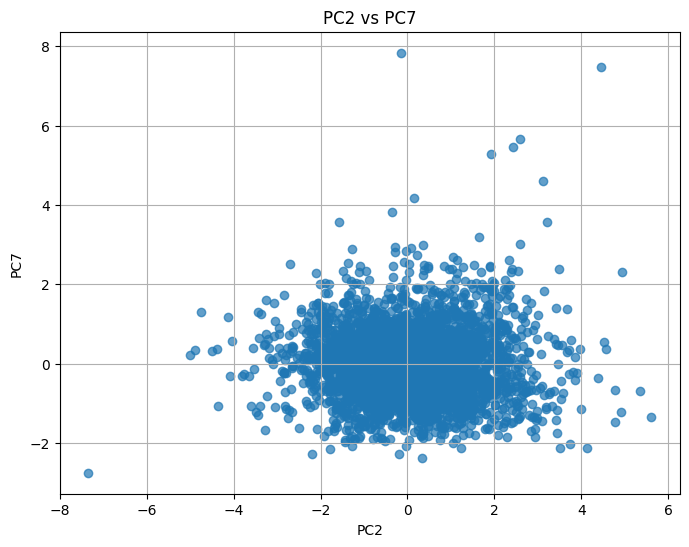

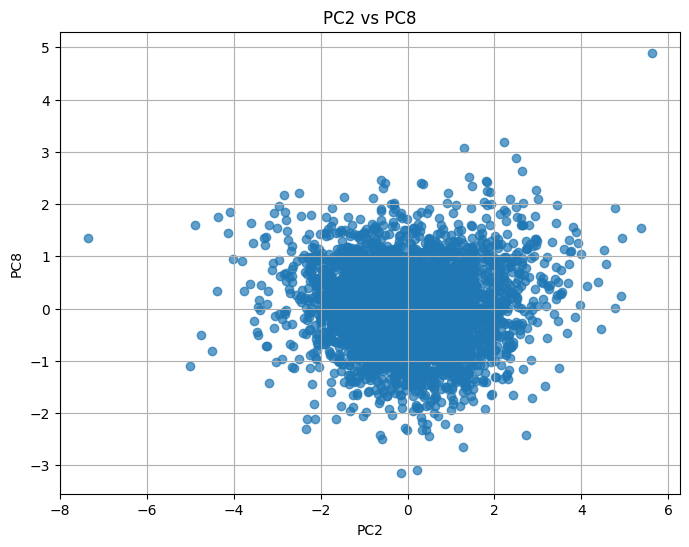

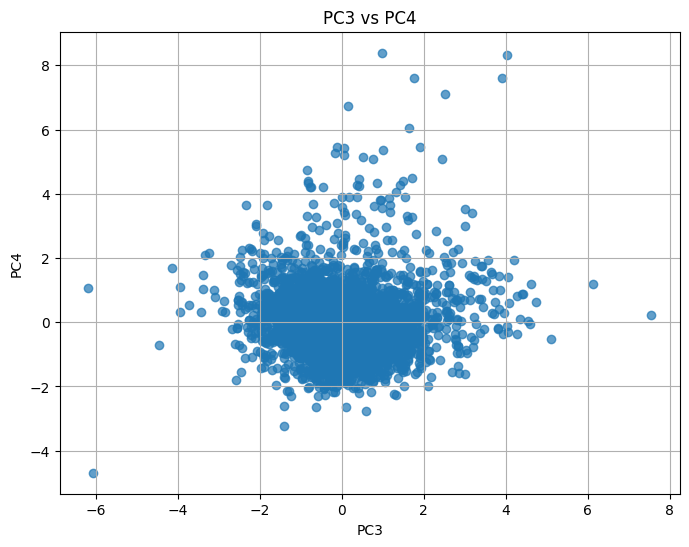

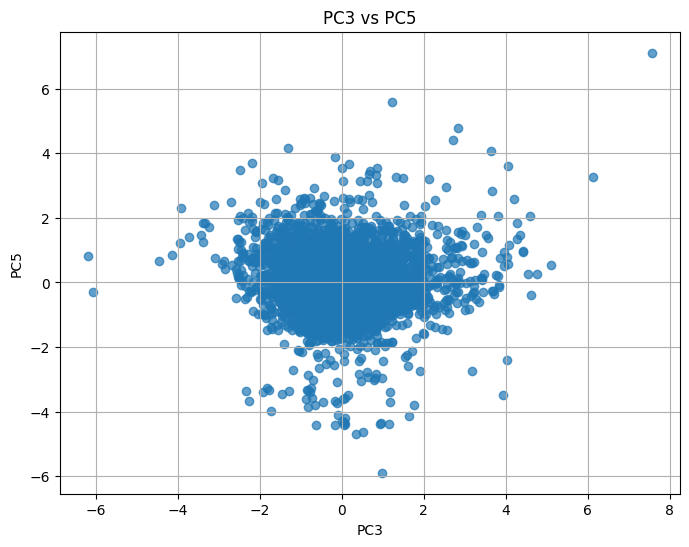

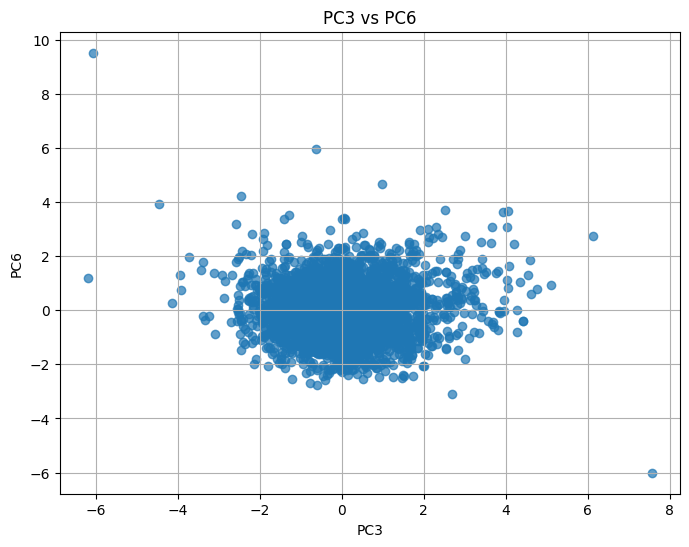

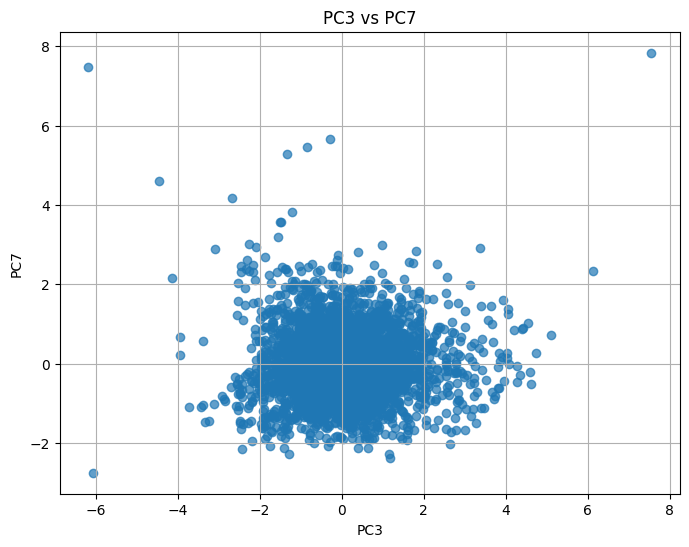

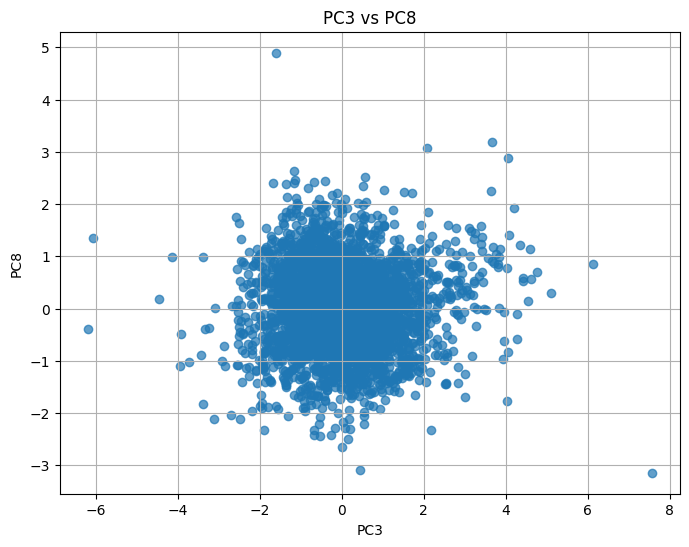

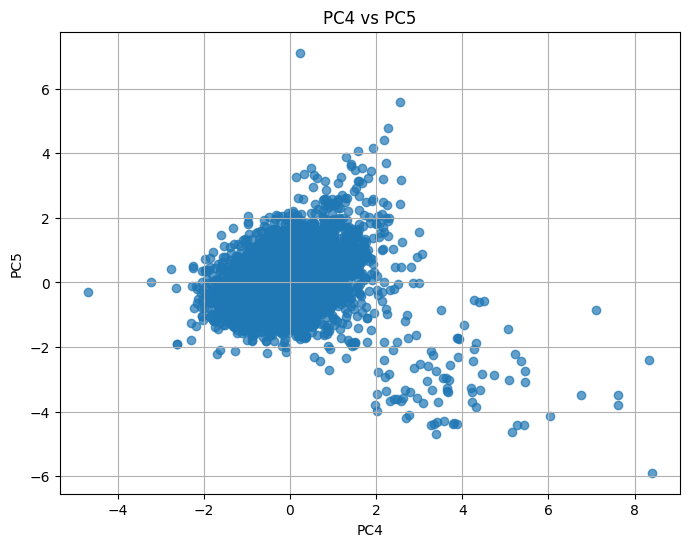

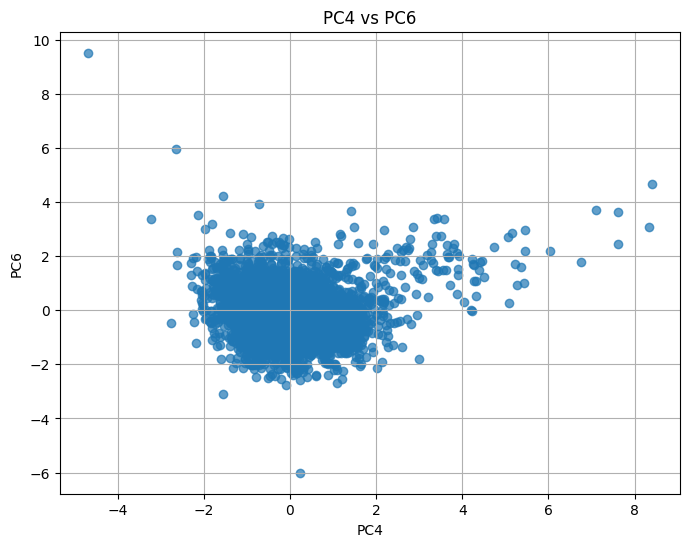

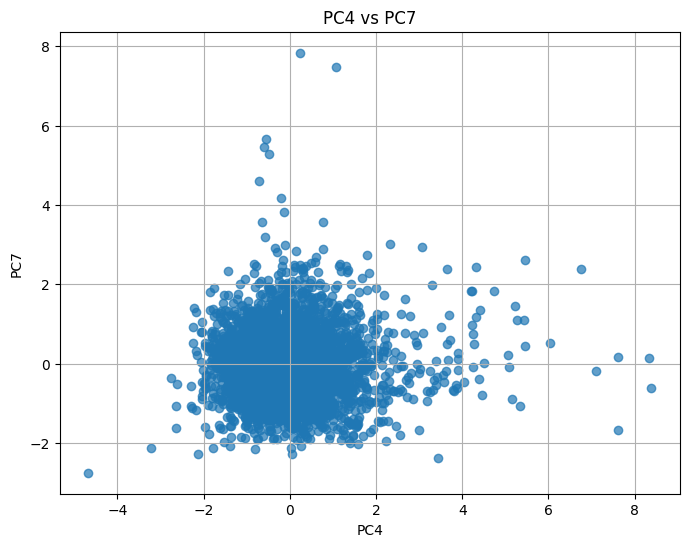

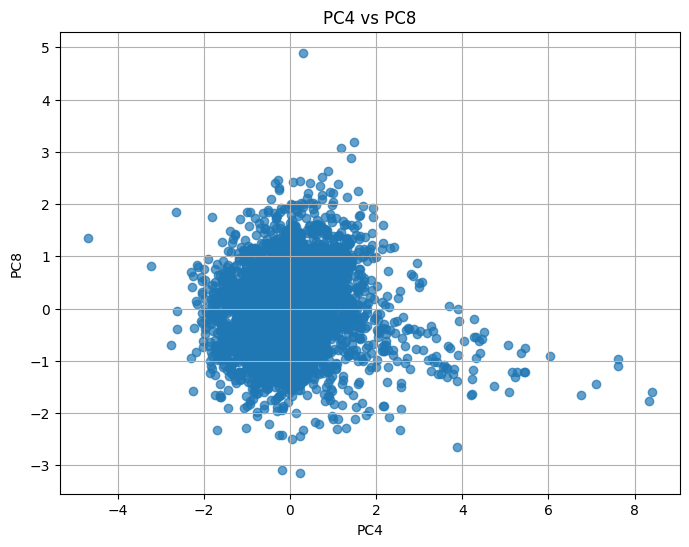

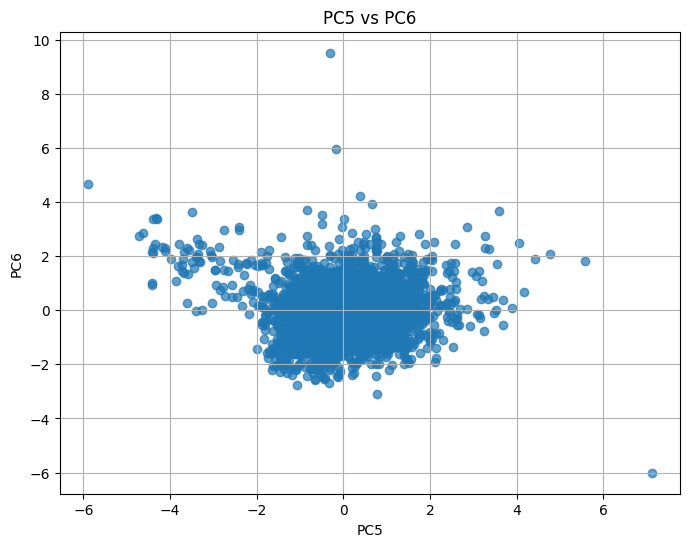

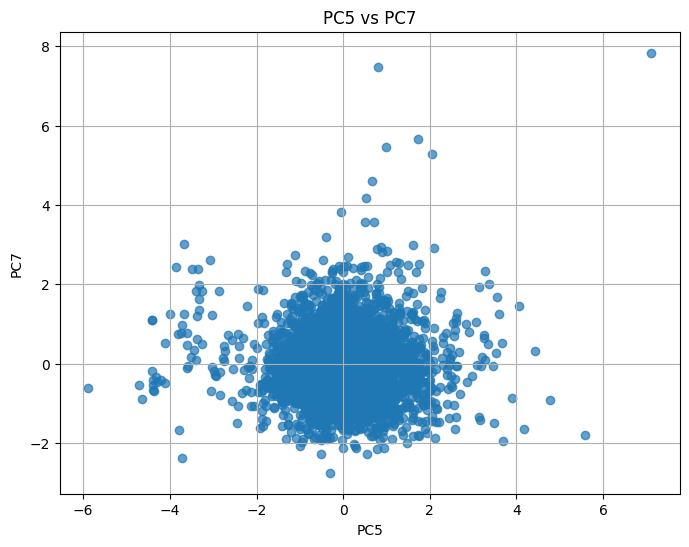

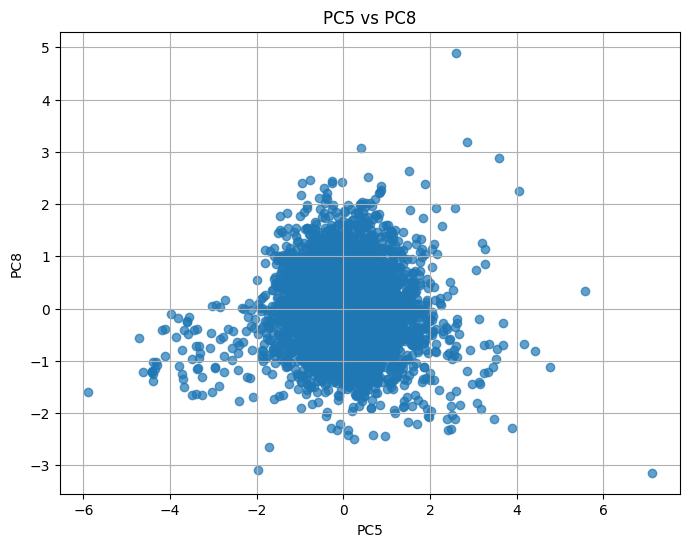

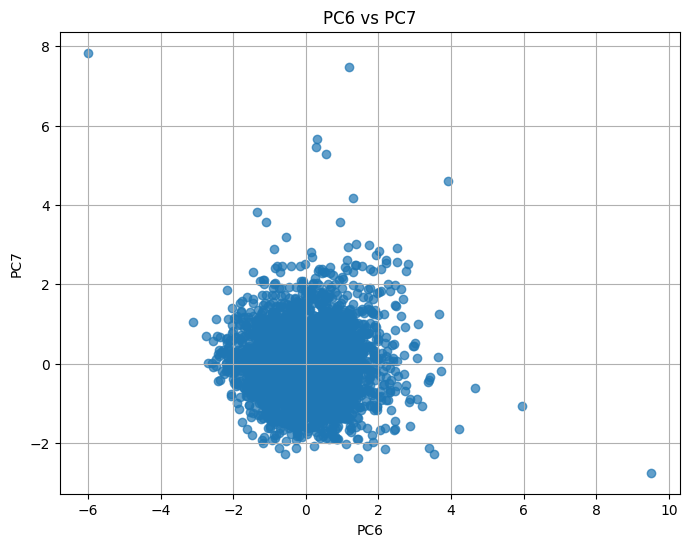

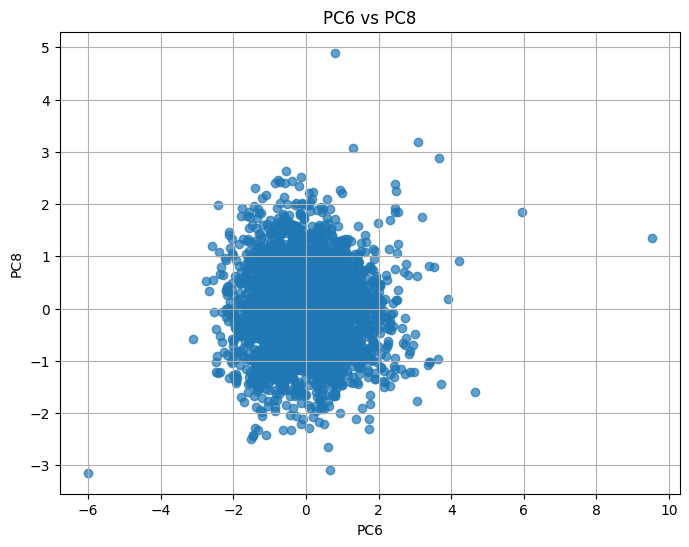

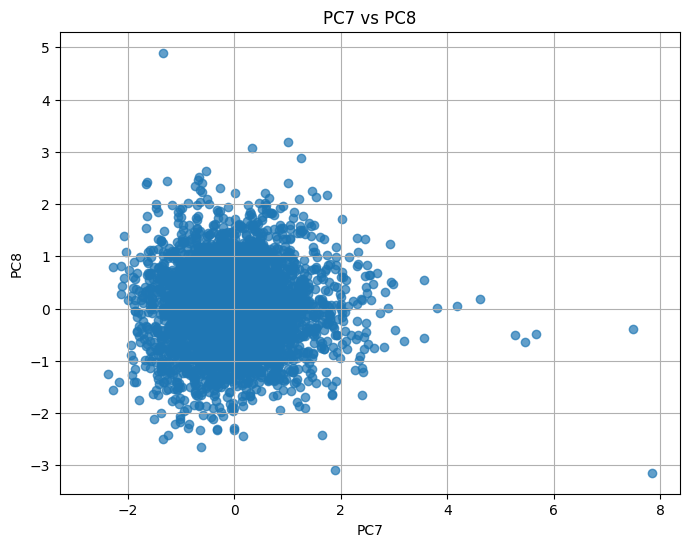

In [12]:
# Finding noise from the data (PCs)
# helper function to compare and visualize PC-variables
def plot_pca_pairs(pca_result, components):
    num_c = pca_result.shape[1]

    # process each pair of PC-variables
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            plt.scatter(pca_result[:, i], pca_result[:, j], alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.show()


plot_pca_pairs(X_pca, pca.components_)